In [28]:
# imports
import os
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Define the path to items folder
items_folder_path = '/Users/MeganWagnerSmith/Desktop/Animal_Crossing_Project/animal-crossing-new-horizons-nookplaza-dataset/'

# List all item files
item_files = [f for f in os.listdir(items_folder_path) if f.endswith('.csv') and f != 'villagers.csv']


In [30]:
# Initialize DataFrame to hold all item data
all_items_df = pd.DataFrame()

# Load each item file and concatenate it to the all_items_df
for file_name in item_files:
    file_path = os.path.join(items_folder_path, file_name)
    temp_df = pd.read_csv(file_path)

In [31]:
# Create path to save visualizations to directory
viz_directory = '/Users/MeganWagnerSmith/Desktop/Animal_Crossing_Project/ACNH-Home-Decor/Visualizations'

In [32]:
# Create DataFrame to store all item data 
# Initialize DataFrame
all_items_df = pd.DataFrame()

for file_name in item_files:
    file_path = os.path.join(items_folder_path, file_name)
    temp_df = pd.read_csv(file_path)

    # Check if 'Buy' column exists in the DataFrame
    if 'Buy' in temp_df.columns:
        temp_df['Buy'].replace('NFS', pd.NA, inplace=True)
        temp_df['Buy'] = pd.to_numeric(temp_df['Buy'], errors='coerce')
    else:
        # Assign NaN if 'Buy' column does not exist
        temp_df['Buy'] = pd.NA

    # Check if 'Sell' column exists
    if 'Sell' in temp_df.columns:
        temp_df['Sell'].replace('NFS', pd.NA, inplace=True)
        temp_df['Sell'] = pd.to_numeric(temp_df['Sell'], errors='coerce')
    else:
        # Assign NaN if 'Sell' column does not exist
        temp_df['Sell'] = pd.NA
    # Select only necessary columns
    if 'Internal ID' in temp_df.columns:
        columns_to_select = ['Internal ID', 'Name', 'Buy', 'Sell']
        temp_df = temp_df[columns_to_select]
        temp_df = temp_df[columns_to_select]
    else:
        # If 'Internal ID' column does not exist, you may choose to skip the file or handle it differently
        continue  # Skip this file
    all_items_df = pd.concat([all_items_df, temp_df])

# Remove duplicates based on the 'Name' column
all_items_df.drop_duplicates(subset=['Internal ID'], inplace=True)

# Display the first few rows of the combined items DataFrame
print(all_items_df.head())

# Check for duplicates
duplicates = all_items_df[all_items_df.duplicated(subset=['Internal ID', 'Name'], keep=False)]
print(duplicates)

   Internal ID                    Name       Buy     Sell
0       3948.0       accessories stand    1500.0    375.0
5      12579.0    ACNH Nintendo Switch   35960.0   8990.0
6       7080.0  agrias butterfly model       NaN   9000.0
7       7453.0      aluminum briefcase  100000.0  25000.0
9        849.0                     amp    5100.0   1275.0
Empty DataFrame
Columns: [Internal ID, Name, Buy, Sell]
Index: []


In [33]:
# Count the total number of NaN values in the 'Internal ID' column
nan_count_internal_id = all_items_df['Internal ID'].isna().sum()
print("Total number of NaN values in 'Internal ID':", nan_count_internal_id)

# Drop NaN values
if nan_count_internal_id > 0:
    all_items_df.dropna(subset=['Internal ID'], inplace=True)

# Convert 'Internal ID' to integers
all_items_df['Internal ID'] = all_items_df['Internal ID'].astype(int)

# Display the first few rows to check the format
print(all_items_df.head())

Total number of NaN values in 'Internal ID': 1
   Internal ID                    Name       Buy     Sell
0         3948       accessories stand    1500.0    375.0
5        12579    ACNH Nintendo Switch   35960.0   8990.0
6         7080  agrias butterfly model       NaN   9000.0
7         7453      aluminum briefcase  100000.0  25000.0
9          849                     amp    5100.0   1275.0


In [34]:
# Load villagers Dataframe
villagers = pd.read_csv('villagers.csv')

def calculate_home_value(row, items_df):
    # Split the item IDs from furniture list, convert to integers
    furniture_ids = [int(x) for x in row['Furniture List'].split(';')] if pd.notna(row['Furniture List']) else []
    # Filter the all_items_df for the given IDs
    furniture_items = items_df[items_df['Internal ID'].isin(furniture_ids)]
    
    # Use name to filter items_df for wallpaper and flooring
    item_names = [row['Wallpaper'], row['Flooring']]
    wallpaper_flooring_items = items_df[items_df['Name'].isin(item_names)]
    
    # Combine furniture and wallpaper/flooring items
    house_items = pd.concat([furniture_items, wallpaper_flooring_items])
    
    # Calculate total buy and sell values of home decor
    total_decor_buy_value = house_items['Buy'].sum()
    total_decor_sell_value = house_items['Sell'].sum()
    
    return total_decor_buy_value, total_decor_sell_value

# Apply the function to each villager/row in the villagers dataset
villagers[['Total Decor Buy Value', 'Total Decor Sell Value']] = villagers.apply(lambda row: calculate_home_value(row, all_items_df), axis=1, result_type='expand')

# Reorder columns

# Display the DataFrame with the calculated values
print(villagers[['Name', 'Total Decor Buy Value', 'Total Decor Sell Value']].head())
villagers.to_csv('villagers_complete.csv')

      Name  Total Decor Buy Value  Total Decor Sell Value
0  Admiral                18170.0                 11142.0
1  Agent S               102440.0                 28010.0
2    Agnes                58500.0                 20973.0
3       Al                29520.0                 14879.0
4  Alfonso                35200.0                 15010.0


In [35]:
# Calculate average cost to buy home decor, and average resale value
average_buy_value = round(villagers['Total Decor Buy Value'].mean(), 2)
average_sell_value = round(villagers['Total Decor Sell Value'].mean(), 2)

average_buy_value, average_sell_value

(105276.05, 42785.25)

In [58]:
# Find character with most expensive home decor
villagers_net_value.sort_values('Total Decor Buy Value', ascending=False).head(1)

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID,Total Decor Buy Value,Total Decor Sell Value,Net Cost
31,Becky,Chicken,Female,Snooty,Music,9-Dec,chicklet,K.K. Chorale,Gorgeous,Elegant,Purple,Pink,palace wall,palace tile,3954;1449;3958;794;2772;1058;1875;3681;987,chn09,D7Atj8BuHK6mgwwvZ,770690.0,193632.0,-577058.0


In [36]:
# Find the item with the highest buy value in ACNH
highest_buy_value_item = all_items_df[all_items_df['Buy'] == all_items_df['Buy'].max()]

# Display the result
print(highest_buy_value_item)

     Internal ID         Name        Buy      Sell
482         5307  royal crown  1200000.0  300000.0


In [37]:
# Find the item with the highest sell value in ACNH
highest_sell_value_item = all_items_df[all_items_df['Sell'] == all_items_df['Sell'].max()]

# Display the result
print(highest_sell_value_item)

     Internal ID         Name        Buy      Sell
482         5307  royal crown  1200000.0  300000.0


<function matplotlib.pyplot.show(close=None, block=None)>

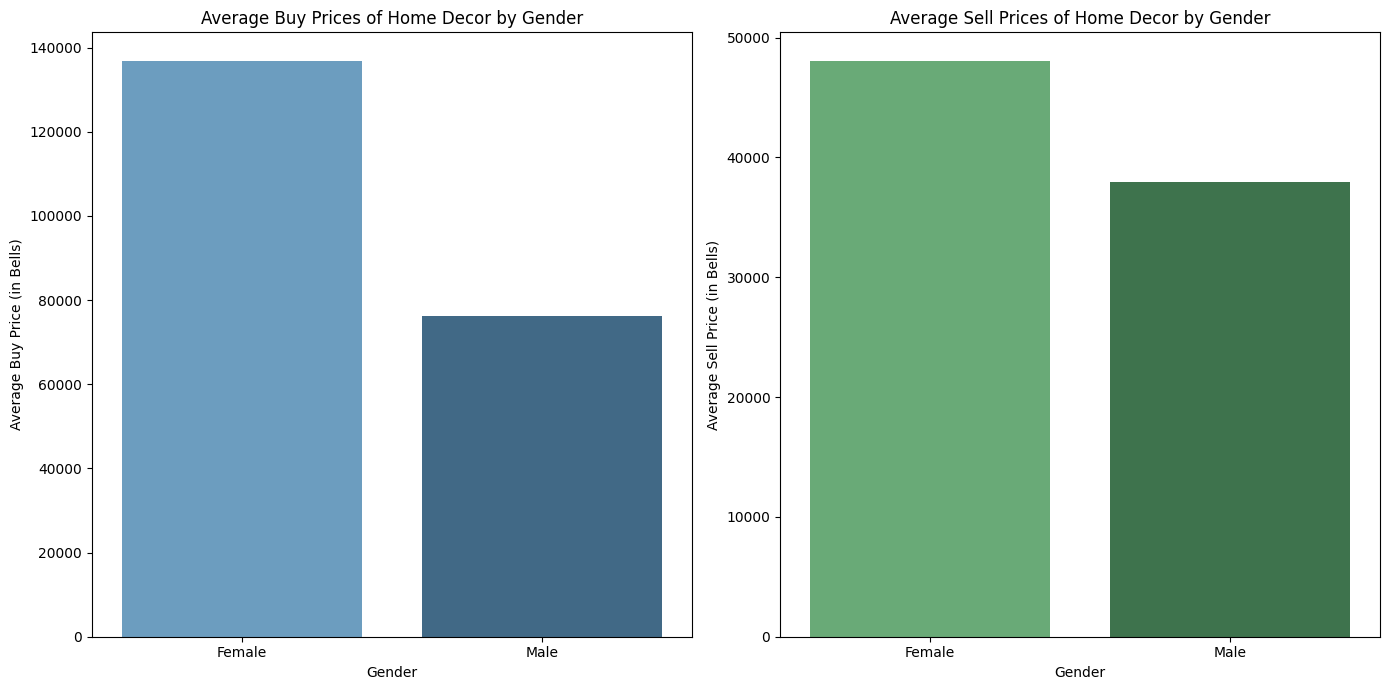

In [38]:
# Visualizing average buy and sell values by gender
# Calculate average buy and sell pirces by gender
avg_prices_by_gender = villagers.groupby('Gender')[['Total Decor Buy Value', 'Total Decor Sell Value']].mean().sort_values(by='Total Decor Buy Value', ascending=False)
 
# Create bar plots:
plt.figure(figsize=(14,7))
 
# Subplot for avg buy prices
plt.subplot(1, 2, 1)
sns.barplot(x=avg_prices_by_gender.index, 
            y=avg_prices_by_gender['Total Decor Buy Value'], 
             palette='Blues_d')
plt.title('Average Buy Prices of Home Decor by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Buy Price (in Bells)')

# Subplot for avg sell prices
plt.subplot(1, 2, 2)
sns.barplot(x=avg_prices_by_gender.index,
            y=avg_prices_by_gender['Total Decor Sell Value'], 
            palette='Greens_d')
plt.title('Average Sell Prices of Home Decor by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Sell Price (in Bells)')

plt.tight_layout()
plt.savefig(f"{viz_directory}/buy_and_sell_by_gender.png")
plt.show

In [39]:
# Calculate the average depreciation rate of home value from purchase cost to selling value
average_depreciation = round(((villagers['Total Decor Buy Value'].mean() - villagers['Total Decor Sell Value'].mean()) / villagers['Total Decor Buy Value'].mean()) * 100, 2)

average_depreciation

59.36

In [40]:
# Create and store function to calculate net profit or loss of homes
def calculate_net_value(df, buy_column, sell_column):
    df['Net Cost'] = df[sell_column] - df[buy_column]
    return df

# Test with villagers df
villagers_net_value = calculate_net_value(villagers, 'Total Decor Buy Value', 'Total Decor Sell Value')
villagers_net_value[['Name', 'Net Cost']].head()

,Name,Net Cost
0,Admiral,-7028.0
1,Agent S,-74430.0
2,Agnes,-37527.0
3,Al,-14641.0
4,Alfonso,-20190.0


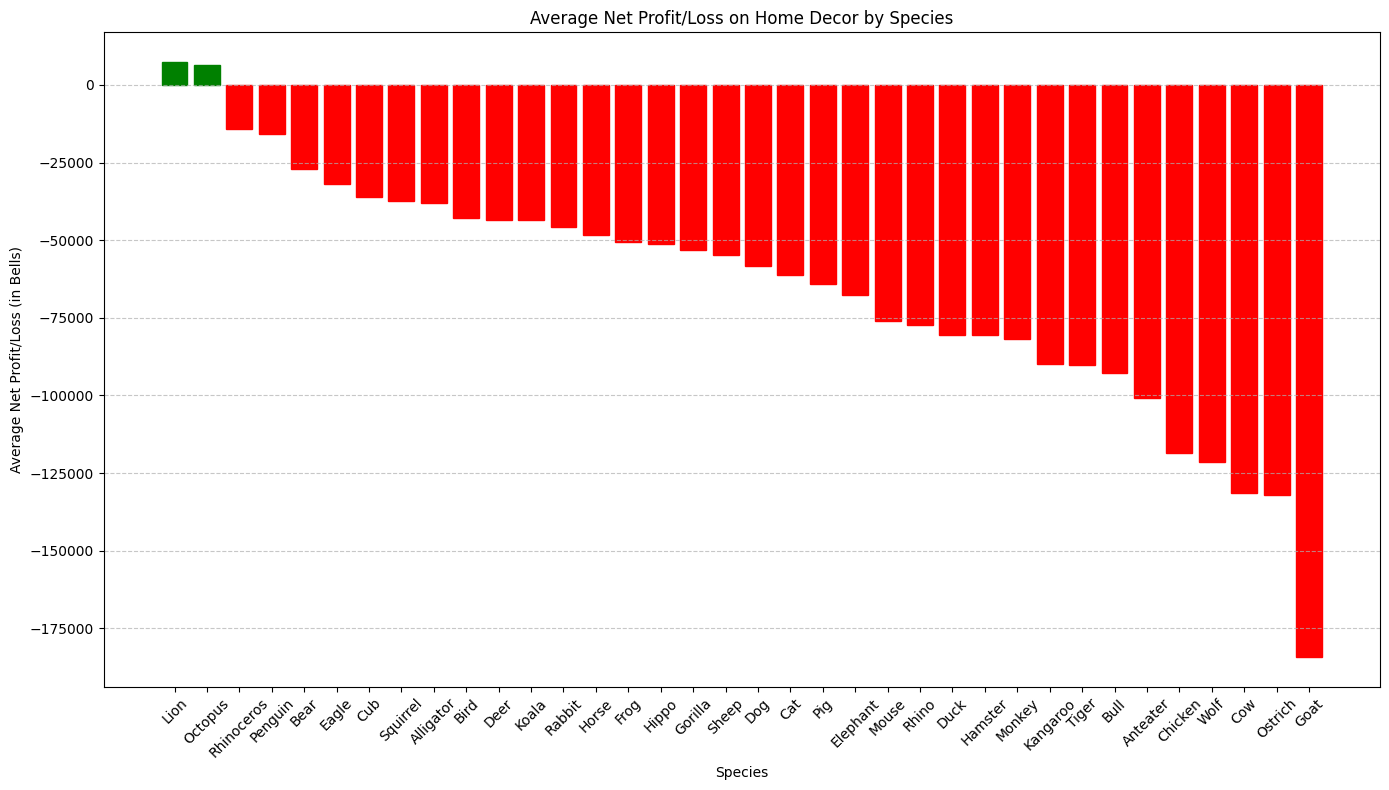

In [41]:
# Average Net Profit/Loss by species
avg_net_value_by_species = villagers_net_value.groupby('Species')['Net Cost'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
bars = plt.bar(avg_net_value_by_species.index, 
               avg_net_value_by_species.values)

# Adding data labels
for bar in bars:
    yval = bar.get_height()

# Color coding based on value
for bar in bars:
    bar.set_color('green' if bar.get_height() > 0 else 'red')

plt.title('Average Net Profit/Loss on Home Decor by Species')
plt.xlabel('Species')
plt.ylabel('Average Net Profit/Loss (in Bells)')
plt.xticks(rotation=45)
plt.grid(axis='y', 
         linestyle='--', 
         alpha=0.7)
plt.tight_layout()
plt.savefig(f"{viz_directory}/avg_net_by_species.png")
plt.show()

In [57]:
# Find character with highest net profit on decor resale
villagers_net_value.sort_values('Net Cost', ascending=False).head(2)

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID,Total Decor Buy Value,Total Decor Sell Value,Net Cost
188,Julian,Horse,Male,Smug,Music,15-Mar,glitter,Space K.K.,Gorgeous,Cool,Purple,Blue,starry-sky wall,cloud flooring,5956;5959;6827;3774;5955;5960;3961;5962;6829;6...,hrs13,CqhXFKr8hdfYSYpRA,4000.0,267325.0,263325.0
128,Elvis,Lion,Male,Cranky,Education,23-Jul,unh-hunh,K.K. Casbah,Gorgeous,Elegant,Red,Black,palace wall,palace tile,5955;5956;5961;5963;5956;5963;3473;5964;8825;5...,lon01,4jYpCpw9nooMZHR8s,6000.0,264025.0,258025.0


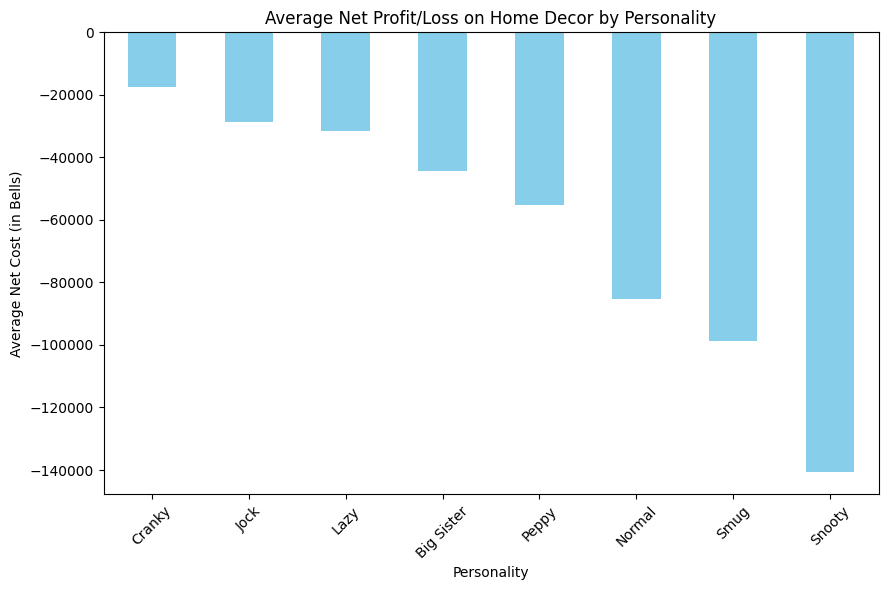

In [42]:
# Comparison of net home values by personality
# Use the previously defined calculate_net_value function to add 'Net Profit/Loss' to the DataFrame
villagers = calculate_net_value(villagers, 'Total Decor Buy Value', 'Total Decor Sell Value')

# Calculate average net cost by species
avg_net_by_personality = villagers.groupby('Personality')['Net Cost'].mean().sort_values(ascending=False)

# Plot the average net cost by personality
avg_net_by_personality.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Net Profit/Loss on Home Decor by Personality')
plt.xlabel('Personality')
plt.ylabel('Average Net Cost (in Bells)')
plt.xticks(rotation=45)
plt.savefig(f"{viz_directory}/avg_net_by_personality.png")
plt.show()

# Sugarshine Data Analysis

In [43]:
# Sugarshine specific data analysis

# Load Sugarshine villagers dataset
sugarshine_villagers = pd.read_csv('sugarshine_villager_names.csv')

# Filter the complete villagers dataset to only show sugarshine villagers, save csv of completed sugarshine dataset
sugarshine_df = villagers[villagers['Name'].isin(sugarshine_villagers['Name'])]
print(sugarshine_df)

sugarshine_df.to_csv('sugarshine_villagers_complete.csv')

         Name     Species  Gender Personality      Hobby Birthday Catchphrase  \
6        Alli   Alligator  Female      Snooty    Fashion    8-Nov     graaagh   
80     Chevre        Goat  Female      Normal  Education    6-Mar      la baa   
188    Julian       Horse    Male        Smug      Music   15-Mar     glitter   
236      Mira      Rabbit  Female  Big Sister    Fitness    6-Jul  cottontail   
254  Octavian     Octopus    Male      Cranky       Play   20-Sep      sucker   
259     Ozzie       Koala    Male        Lazy       Play    7-May    ol' bear   
269    Peanut    Squirrel  Female       Peppy    Fashion    8-Jun     slacker   
318     Rowan       Tiger    Male        Jock    Fitness   26-Aug       mango   
370    Ursala        Bear  Female  Big Sister      Music   16-Jan    grooomph   
391    Azalea  Rhinoceros  Female      Snooty     Nature   18-Dec       merci   

     Favorite Song   Style 1   Style 2     Color 1   Color 2  \
6        K.K. Soul  Gorgeous   Elegant      

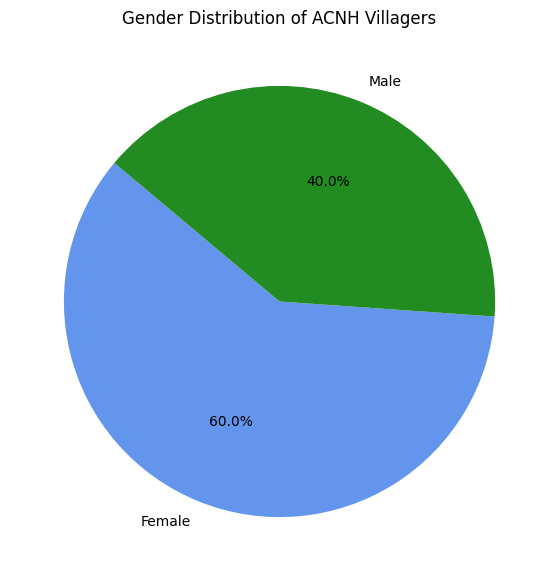

In [44]:
# Sugarshine Demographic Profile
# Calculate gender distribution among sugarshine villagers
gender_distribution = sugarshine_df['Gender'].value_counts()

# Pie chart visualization setup
plt.figure(figsize=(7,7))
plt.pie(
    gender_distribution, 
    labels=gender_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140,
    colors = [
        'cornflowerblue', 'forestgreen'
    ])
plt.title('Gender Distribution of ACNH Villagers')

# Save and show
plt.savefig(f"{viz_directory}/Sugarshine_Gender_Distribution.png")
plt.show()

<Figure size 640x480 with 0 Axes>

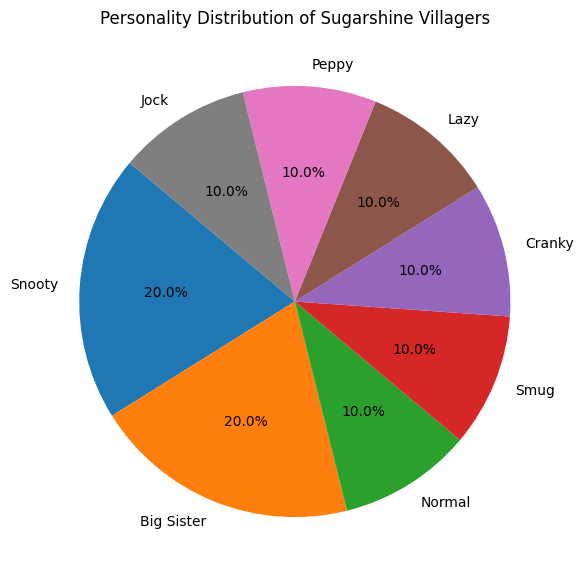

In [45]:
# Sugarshine Demographic Profile
# Calculate gender distribution among sugarshine villagers
plt.cool()
personality_distribution = sugarshine_df['Personality'].value_counts()

# Pie chart visualization setup
plt.figure(figsize=(7,7))
plt.pie(personality_distribution, 
        labels=personality_distribution.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Personality Distribution of Sugarshine Villagers')
# Save and show
plt.savefig(f"{viz_directory}/Sugarshine_Personality_Distribution.png")
plt.show()

<Figure size 640x480 with 0 Axes>

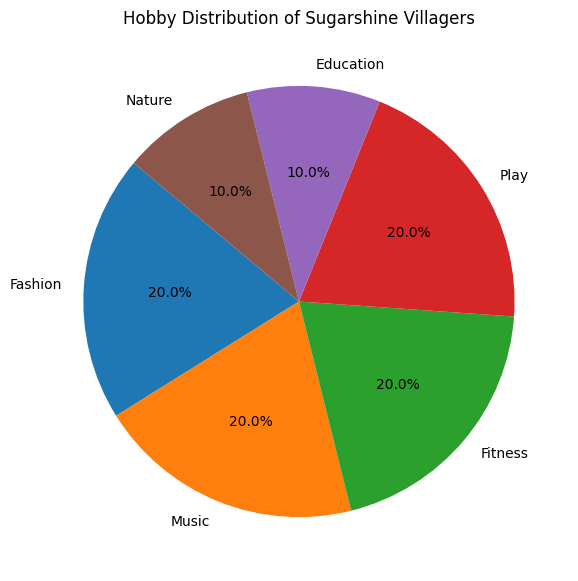

In [46]:
# Sugarshine Demographic Profile
# Calculate hobby distribution among sugarshine villagers
plt.cool()
hobby_distribution = sugarshine_df['Hobby'].value_counts()

# Pie chart visualization setup
plt.figure(figsize=(7,7))
plt.pie(hobby_distribution, 
        labels=hobby_distribution.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Hobby Distribution of Sugarshine Villagers')
# Save and show
plt.savefig(f"{viz_directory}/Sugarshine_Hobby_Distribution.png")
plt.show()

In [47]:
# Calculate average cost to buy and sell prices of Sugarshine home decor
sugarshine_average_buy_value = round(sugarshine_df['Total Decor Buy Value'].mean(), 2)
sugarshine_average_sell_value = round(sugarshine_df['Total Decor Sell Value'].mean(), 2)

sugarshine_average_buy_value, sugarshine_average_sell_value

(106562.0, 68416.6)

In [48]:
# Calculate the average depreciation rate of home value from purchase cost to selling value
average_depreciation = round(((sugarshine_df['Total Decor Buy Value'].mean() - sugarshine_df['Total Decor Sell Value'].mean()) / sugarshine_df['Total Decor Buy Value'].mean()) * 100, 2)

average_depreciation

35.8

<function matplotlib.pyplot.show(close=None, block=None)>

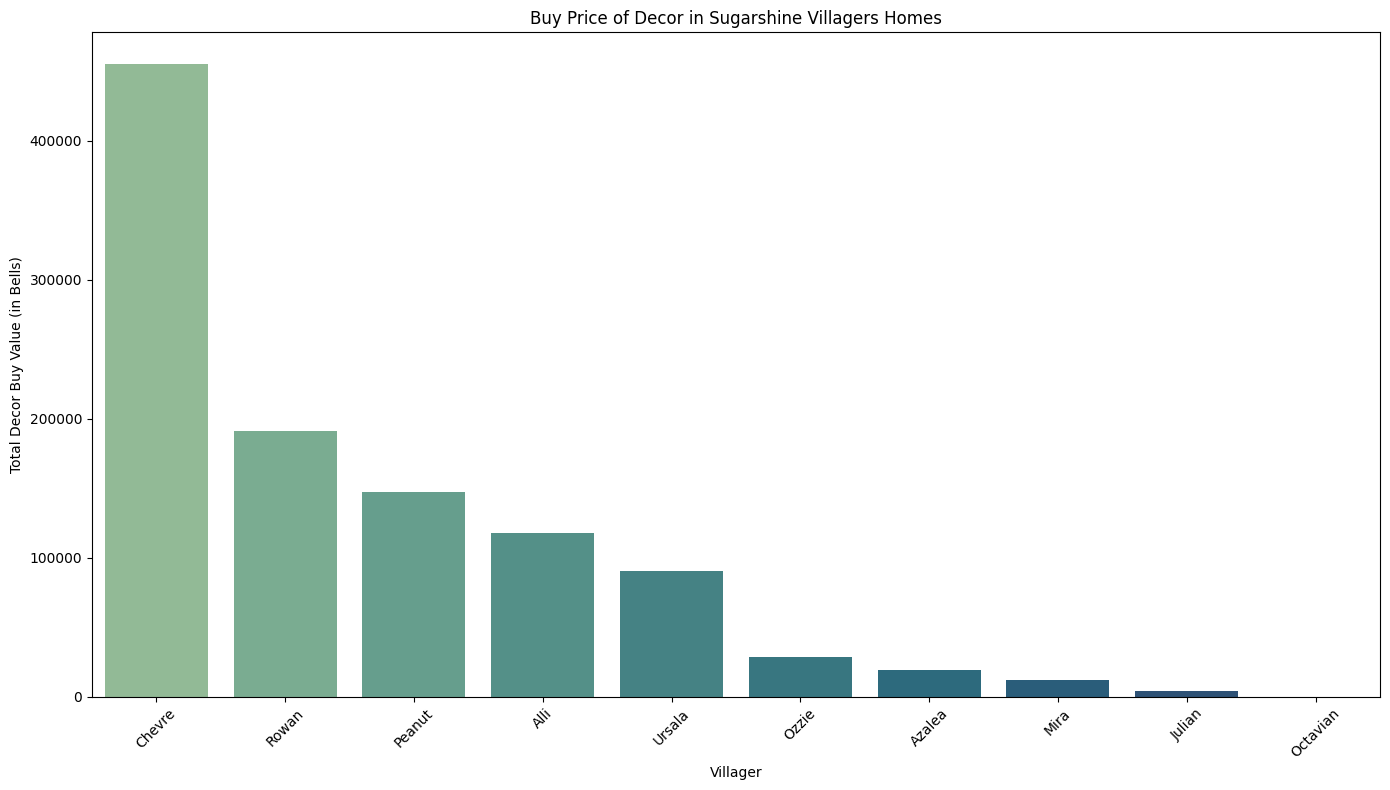

In [49]:
# Bar chart of Sugarshine home decor purchase costs
# Sort the DataFrame by 'Total Decor Buy Value' in descending order before plotting
sugarshine_buy_sorted = sugarshine_df.sort_values('Total Decor Buy Value', ascending=False)
# Create plot
plt.figure(figsize=(14,8))
sugarshine_buy_value_plot = sns.barplot(x='Name', 
                                        y='Total Decor Buy Value', 
                                        data=sugarshine_buy_sorted, 
                                        palette='crest')
plt.title('Buy Price of Decor in Sugarshine Villagers Homes')
plt.xlabel('Villager')
plt.ylabel('Total Decor Buy Value (in Bells)')
plt.xticks(rotation=45)
plt.tight_layout()
# Save and show
plt.savefig('Visualizations/sugarshine_home_buy_values.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

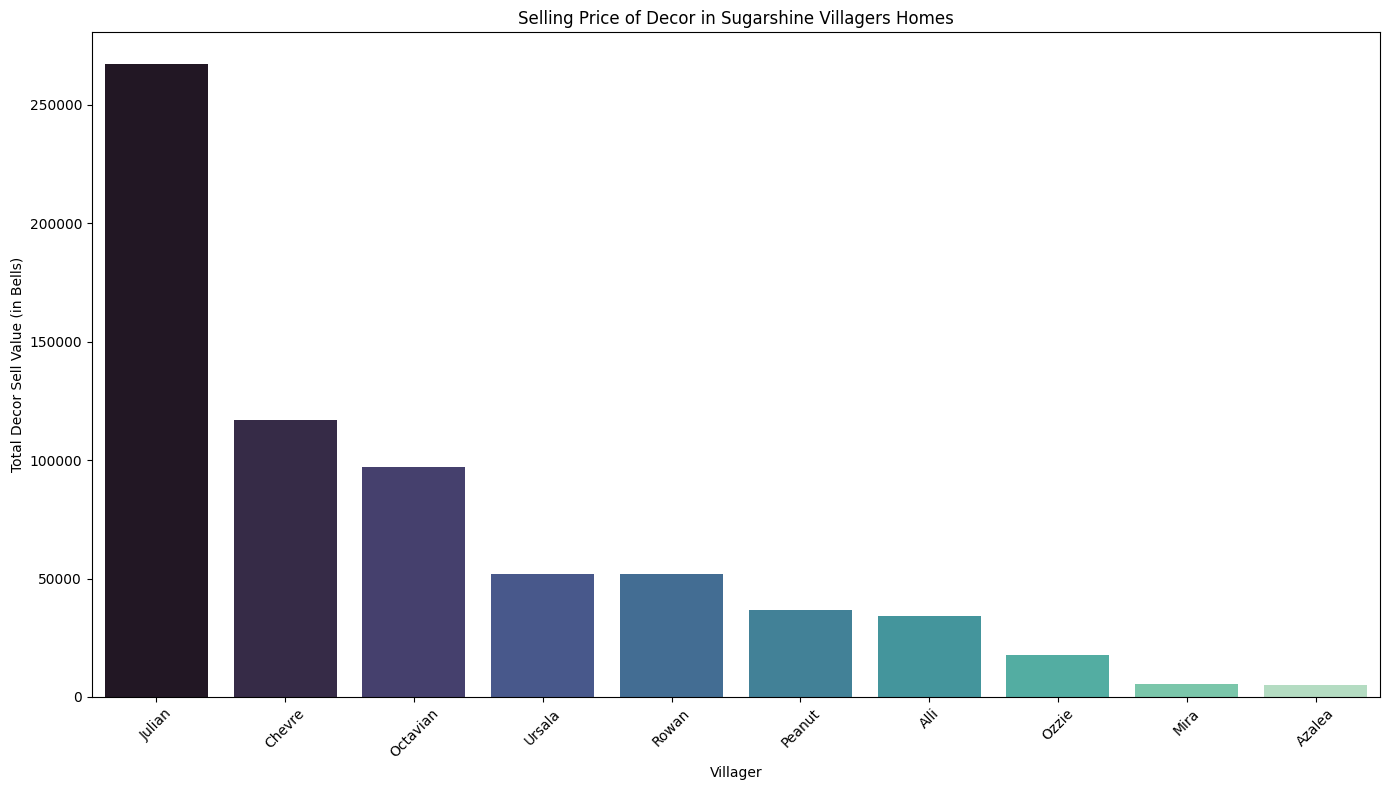

In [50]:
# Bar chart of Sugarshine home decor selling prices
# Sort the DataFrame by 'Total Decor Buy Value' in descending order before plotting
sugarshine_sell_sorted = sugarshine_df.sort_values('Total Decor Sell Value', ascending=False)
# Create plot
# Create plot
plt.figure(figsize=(14,8))
sugarshine_sell_value_plot = sns.barplot(x='Name', 
                                        y='Total Decor Sell Value', 
                                        data=sugarshine_sell_sorted, 
                                        palette='mako')
plt.title('Selling Price of Decor in Sugarshine Villagers Homes')
plt.xlabel('Villager')
plt.ylabel('Total Decor Sell Value (in Bells)')
plt.xticks(rotation=45)
plt.tight_layout()
# Save and show
plt.savefig(f"{viz_directory}/sugarshine_home_sell_values.png")
plt.show

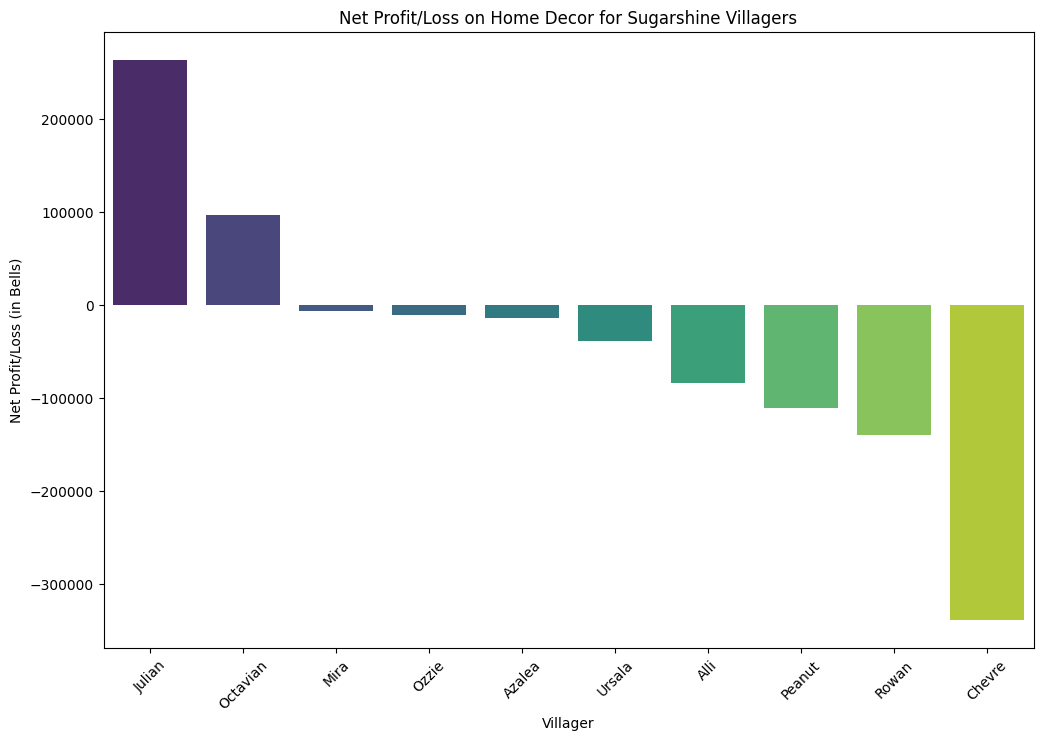

In [51]:
# Calculate Net Cost for Sugarshine Villagers
calculate_net_value(sugarshine_df, 'Total Decor Buy Value', 'Total Decor Sell Value')
sugarshine_df_sorted = sugarshine_df.sort_values('Net Cost', ascending=False)
# Create a bar chart
plt.figure(figsize=(12, 8))
net_value_plot = sns.barplot(x='Name', 
                             y='Net Cost', 
                             data=sugarshine_df_sorted, 
                             palette="viridis")
plt.title('Net Profit/Loss on Home Decor for Sugarshine Villagers')
plt.xlabel('Villager')
plt.ylabel('Net Profit/Loss (in Bells)')
plt.xticks(rotation=45)
plt.savefig(f"{viz_directory}/sugarshine_net_decor_values.png")
plt.show()